Automatic Relevance Determination (ARD) is based on Bayesian inference method Scikit-learn API provides ARDRegression class to fit the regression model by using ARD method. The ARDRegression considers the model weights as a Gaussian distributed and estimates the lambda and alpha parameters through the iteration.

In [1]:
from sklearn.linear_model import ARDRegression
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config

In [7]:
# make_regression() function will create a dataset with a linear relationship between inputs and the outputs

x, y = make_regression(n_samples=5000, n_features=10)

# Data Scaling

x = scale(x)
y = scale(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.10)

set_config(print_changed_only=False)

Regression

In [8]:
ardr = ARDRegression()

In [9]:
ardr.fit(xtrain, ytrain)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize='deprecated', threshold_lambda=10000.0, tol=0.001,
              verbose=False)

In [11]:
score = ardr.score(xtrain, ytrain)
score

1.0

In [13]:
y_pred = ardr.predict(xtest)
y_pred

array([ 1.85885204e+00,  8.39010552e-02,  6.69365286e-01,  1.14282784e+00,
       -1.17590268e+00, -6.54710301e-01, -7.25202916e-01, -4.97959543e-02,
       -2.88230087e-01,  6.71833095e-01, -2.20422360e-02, -2.08684547e+00,
        9.55093815e-01, -6.05694220e-01,  1.00378306e+00, -1.00213244e+00,
        4.17828057e-01, -3.03895524e-01, -8.04256259e-01,  2.72080715e-01,
       -2.47524490e+00,  4.27009699e-01, -1.65671174e+00, -7.63409920e-01,
        1.23013920e+00,  8.40154823e-01,  1.67028854e+00, -8.98728816e-01,
       -7.40851068e-01,  6.39174244e-02,  1.94655212e+00,  1.10099689e+00,
       -6.98741659e-01,  7.38660880e-02, -8.57463884e-01,  1.35363768e+00,
        7.42194499e-02, -1.57451769e+00,  4.38124500e-01,  8.38408471e-01,
       -6.45077730e-01, -2.32343946e+00, -1.44573994e+00, -9.93206872e-01,
        1.19560537e-01,  1.26562634e+00,  2.28048476e-01, -8.35309025e-01,
        6.37412158e-01,  1.28323347e+00, -3.32309806e-01,  5.39152268e-01,
        6.65741110e-01,  

In [19]:
mse = mean_squared_error(ytest, y_pred)
rmse = mse*(1/2.0)

rmse

2.1502137044887847e-23

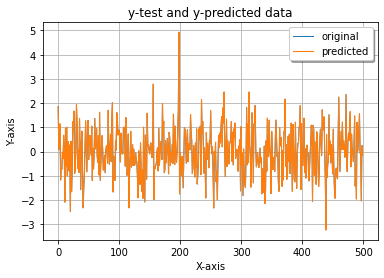

In [21]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

/home/devangm/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

R-squared: 0.7458882335421497
MSE:  0.27986363127306974
RMSE:  0.13993181563653487


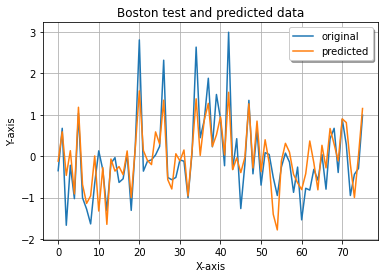

In [22]:
boston = load_boston()
x, y = boston.data, boston.target

x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

ardr = ARDRegression()
ardr.fit(xtrain, ytrain)

score = ardr.score(xtrain, ytrain)
print("R-squared:", score)

ypred = ardr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 